In [14]:
import pandas as pd
banking =pd.read_csv("banking_dirty.csv", index_col=0)

acct_cur=['dollar',
 'dollar',
 'dollar',
 'euro',
 'euro',
 'dollar',
 'dollar',
 'euro',
 'dollar',
 'euro',
 'dollar',
 'dollar',
 'dollar',
 'euro',
 'dollar',
 'dollar',
 'euro',
 'euro',
 'dollar',
 'euro',
 'dollar',
 'dollar',
 'euro',
 'euro',
 'euro',
 'dollar',
 'dollar',
 'euro',
 'dollar',
 'dollar',
 'dollar',
 'dollar',
 'dollar',
 'dollar',
 'dollar',
 'dollar',
 'dollar',
 'euro',
 'euro',
 'dollar',
 'dollar',
 'dollar',
 'dollar',
 'dollar',
 'euro',
 'dollar',
 'dollar',
 'dollar',
 'euro',
 'dollar',
 'dollar',
 'euro',
 'euro',
 'euro',
 'euro',
 'dollar',
 'dollar',
 'dollar',
 'dollar',
 'dollar',
 'dollar',
 'dollar',
 'dollar',
 'dollar',
 'dollar',
 'dollar',
 'euro',
 'dollar',
 'dollar',
 'dollar',
 'euro',
 'dollar',
 'dollar',
 'dollar',
 'dollar',
 'dollar',
 'euro',
 'dollar',
 'euro',
 'euro',
 'euro',
 'dollar',
 'dollar',
 'dollar',
 'dollar',
 'euro',
 'euro',
 'euro',
 'dollar',
 'euro',
 'dollar',
 'dollar',
 'dollar',
 'dollar',
 'dollar',
 'dollar',
 'dollar',
  'dollar',
 'dollar',
 'dollar']


banking['acct_cur'] = pd.DataFrame(acct_cur)
print(banking)

     cust_id  birth_date  age  acct_amount  inv_amount   fund_A   fund_B  \
0   870A9281  1962-06-09   58     63523.31       51295  30105.0   4138.0   
1   166B05B0  1962-12-16   58     38175.46       15050   4995.0    938.0   
2   BFC13E88  1990-09-12   34     59863.77       24567  10323.0   4590.0   
3   F2158F66  1985-11-03   35     84132.10       23712   3908.0    492.0   
4   7A73F334  1990-05-17   30    120512.00       93230  12158.4  51281.0   
..       ...         ...  ...          ...         ...      ...      ...   
95  CA507BA1  1974-08-10   46     12209.84        7515    190.0    931.0   
96  B99CD662  1989-12-12   31     92838.44       49089   2453.0   7892.0   
97  13770971  1984-11-29   36     92750.87       27962   3352.0   7547.0   
98  93E78DA3  1969-12-14   51     41942.23       29662   1758.0  11174.0   
99  AC91D689  1993-05-18   27     99490.61       32149   2184.0  17918.0   

     fund_C   fund_D account_opened last_transaction acct_cur  
0    1420.0  15632.0   

# Ambiguous dates

You have a DataFrame containing a subscription_date column that was collected from various sources with different Date formats such as YYYY-mm-dd and YYYY-dd-mm. What is the best way to unify the formats for ambiguous values such as 2019-04-07?

## Possible Answers

* Set them to NA and drop them.

* Infer the format of the data in question by checking the format of subsequent and previous values.

* Infer the format from the original data source.

* All of the above are possible, as long as we investigate where our data comes from, and understand the dynamics affecting it before cleaning it.

## ANSWER:

* All of the above are possible, as long as we investigate where our data comes from, and understand the dynamics affecting it before cleaning it.

``Great work! Like most cleaning data tasks, ambiguous dates require a thorough understanding of where your data comes from. Diagnosing problems is the first step in finding the best solution!``

# Uniform currencies

In this exercise and throughout this chapter, you will be working with a retail banking dataset stored in the banking DataFrame. The dataset contains data on the amount of money stored in accounts (acct_amount), their currency (acct_cur), amount invested (inv_amount), account opening date (account_opened), and last transaction date (last_transaction) that were consolidated from American and European branches.

You are tasked with understanding the average account size and how investments vary by the size of account, however in order to produce this analysis accurately, you first need to unify the currency amount into dollars. The pandas package has been imported as pd, and the banking DataFrame is in your environment.

# Instructions

* Find the rows of acct_cur in banking that are equal to 'euro' and store them in the variable acct_eu.
* Find all the rows of acct_amount in banking that fit the acct_eu condition, and convert them to USD by multiplying them with 1.1.
* Find all the rows of acct_cur in banking that fit the acct_eu condition, set them to 'dollar'.

In [15]:
# Find values of acct_cur that are equal to 'euro'
acct_eu = banking['acct_cur'] == 'euro'

# Convert acct_amount where it is in euro to dollars
banking.loc[acct_eu, 'acct_amount'] = banking.loc[acct_eu, 'acct_amount'] * 1.1 

# Unify acct_cur column by changing 'euro' values to 'dollar'
banking.loc[acct_eu, 'acct_cur'] = 'dollar'

# Assert that only dollar currency remains
assert banking['acct_cur'].unique() == 'dollar'

# Uniform dates

After having unified the currencies of your different account amounts, you want to add a temporal dimension to your analysis and see how customers have been investing their money given the size of their account over each year. The account_opened column represents when customers opened their accounts and is a good proxy for segmenting customer activity and investment over time.

However, since this data was consolidated from multiple sources, you need to make sure that all dates are of the same format. You will do so by converting this column into a datetime object, while making sure that the format is inferred and potentially incorrect formats are set to missing. The banking DataFrame is in your environment and pandas was imported as pd.


Instructions 1/4

Print the header of account_opened from the banking DataFrame and take a look at the different results.


In [16]:
# Print the header of account_opend
print(banking['account_opened'].head())

0    02-09-18
1    28-02-19
2    25-04-18
3    07-11-17
4    14-05-18
Name: account_opened, dtype: object


## Instructions 2/4

## Question

Take a look at the output. You tried converting the values to datetime using the default to_datetime() function without changing any argument, however received the following error:

``ValueError: month must be in 1..12``

Why do you think that is?

## Possible Answers

* The to_datetime() function needs to be explicitly told which date format each row is in.

* The to_datetime() function can only be applied on YY-mm-dd date formats.

* The 21-14-17 entry is erroneous and leads to an error.

## ANSWER:

* The 21-14-17 entry is erroneous and leads to an error.

## Instructions 3/4

* Convert the account_opened column to datetime, while making sure the date format is inferred and that erroneous formats that raise error return a missing value.

## Instructions 4/4

* Extract the year from the amended account_opened column and assign it to the acct_year column.
* Print the newly created acct_year column.

In [17]:
# Print the header of account_opend
print(banking['account_opened'].head())

# Convert account_opened to datetime
banking['account_opened'] = pd.to_datetime(banking['account_opened'],
                                           # Infer datetime format
                                           infer_datetime_format = True,
                                           # Return missing value for error
                                           errors = 'coerce') 

# Get year of account opened
banking['acct_year'] = banking['account_opened'].dt.strftime('%Y')

# Print acct_year
print(banking['acct_year'])

0    02-09-18
1    28-02-19
2    25-04-18
3    07-11-17
4    14-05-18
Name: account_opened, dtype: object
0     2018
1     2019
2     2018
3     2017
4     2018
      ... 
95    2018
96    2017
97    2017
98    2017
99    2017
Name: acct_year, Length: 100, dtype: object


# Cross field or no cross field?

Throughout this course, you've been immersed in a variety of data cleaning problems from range constraints, data type constraints, uniformity and more.

In this lesson, you were introduced to cross field validation as a means to sanity check your data and making sure you have strong data integrity.

Now, you will map different applicable concepts and techniques to their respective categories.

## Instructions

Map different applicable concepts and techniques to their respective categories.

* Cross field Validation:
    * Confirming the age providined by users by cross checking their birthday.
    * Row wise operations such as ``.sum(axis=1)``.

## 
* Not Cross field Validation:
    * Make sure that a revenue column is a numeric column.
    * The use of the ``.astype()`` method.
    * Making sure a subscription_date column has no values set in the future.

# How's our data integrity?

In [18]:
# Store fund columns to sum against
fund_columns = ['fund_A', 'fund_B', 'fund_C', 'fund_D']

# Find rows where fund_columns row sum == inv_amount
inv_equ = banking[fund_columns].sum(axis=1) == banking['inv_amount']

# Store consistent and inconsistent data
consistent_inv = banking[inv_equ]
inconsistent_inv = banking[~inv_equ]

# Store consistent and inconsistent data
print("Number of inconsistent investments: ", inconsistent_inv.shape[0])

Number of inconsistent investments:  8


In [19]:
import datetime as dt
banking['birth_date'] = pd.to_datetime(banking['birth_date'])

# Store today's date and find ages
today = dt.date.today()
ages_manual = today.year - banking['birth_date'].dt.year

# Find rows where age column == ages_manual
age_equ = banking["age"] == ages_manual

# Store consistent and inconsistent data
consistent_ages = banking[age_equ]
inconsistent_ages = banking[~age_equ]

# Store consistent and inconsistent data
print("Number of inconsistent ages: ", inconsistent_ages.shape[0])

Number of inconsistent ages:  100


# Is this missing at random?

You've seen in the video exercise how there are a variety of missingness types when observing missing data. As a reminder, missingness types can be described as the following:

* **Missing Completely at Random**: No systematic relationship between a column's missing values and other or own values.
* **Missing at Random**: There is a systematic relationship between a column's missing values and other observed values.
* **Missing not at Random**: There is a systematic relationship between a column's missing values and unobserved values.

You have a DataFrame containing customer satisfaction scores for a service. What type of missingness is the following?

                              A customer satisfaction_score column with missing values for highly dissatisfied customers.


## Possible Answers

* Missing completely at random.

* Missing at random.

* Missing not at random.

## ANSWER:

* Missing not at random.

# Missing investors

Dealing with missing data is one of the most common tasks in data science. There are a variety of types of missingness, as well as a variety of types of solutions to missing data.

You just received a new version of the banking DataFrame containing data on the amount held and invested for new and existing customers. However, there are rows with missing inv_amount values.

You know for a fact that most customers below 25 do not have investment accounts yet, and suspect it could be driving the missingness. The pandas, missingno and matplotlib.pyplot packages have been imported as pd, msno and plt respectively. The banking DataFrame is in your environment.

# Missing investors
Dealing with missing data is one of the most common tasks in data science. There are a variety of types of missingness, as well as a variety of types of solutions to missing data.

You just received a new version of the banking DataFrame containing data on the amount held and invested for new and existing customers. However, there are rows with missing inv_amount values.

You know for a fact that most customers below 25 do not have investment accounts yet, and suspect it could be driving the missingness. The pandas, missingno and matplotlib.pyplot packages have been imported as pd, msno and plt respectively. The banking DataFrame is in your environment.

cust_id             0
birth_date          0
age                 0
acct_amount         0
inv_amount          0
fund_A              0
fund_B              0
fund_C              0
fund_D              0
account_opened      0
last_transaction    0
acct_cur            0
acct_year           0
dtype: int64


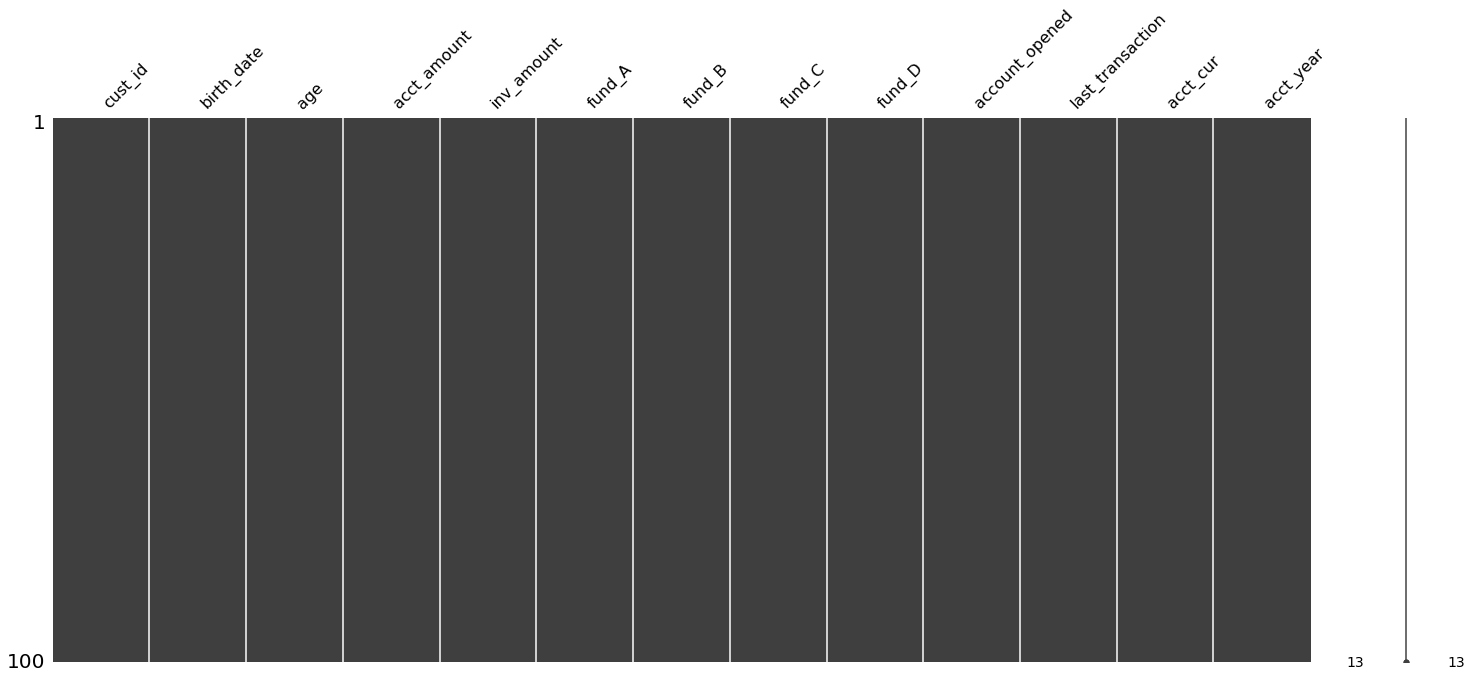

       age  acct_amount  inv_amount  fund_A  fund_B  fund_C  fund_D
count  0.0          0.0         0.0     0.0     0.0     0.0     0.0
mean   NaN          NaN         NaN     NaN     NaN     NaN     NaN
std    NaN          NaN         NaN     NaN     NaN     NaN     NaN
min    NaN          NaN         NaN     NaN     NaN     NaN     NaN
25%    NaN          NaN         NaN     NaN     NaN     NaN     NaN
50%    NaN          NaN         NaN     NaN     NaN     NaN     NaN
75%    NaN          NaN         NaN     NaN     NaN     NaN     NaN
max    NaN          NaN         NaN     NaN     NaN     NaN     NaN


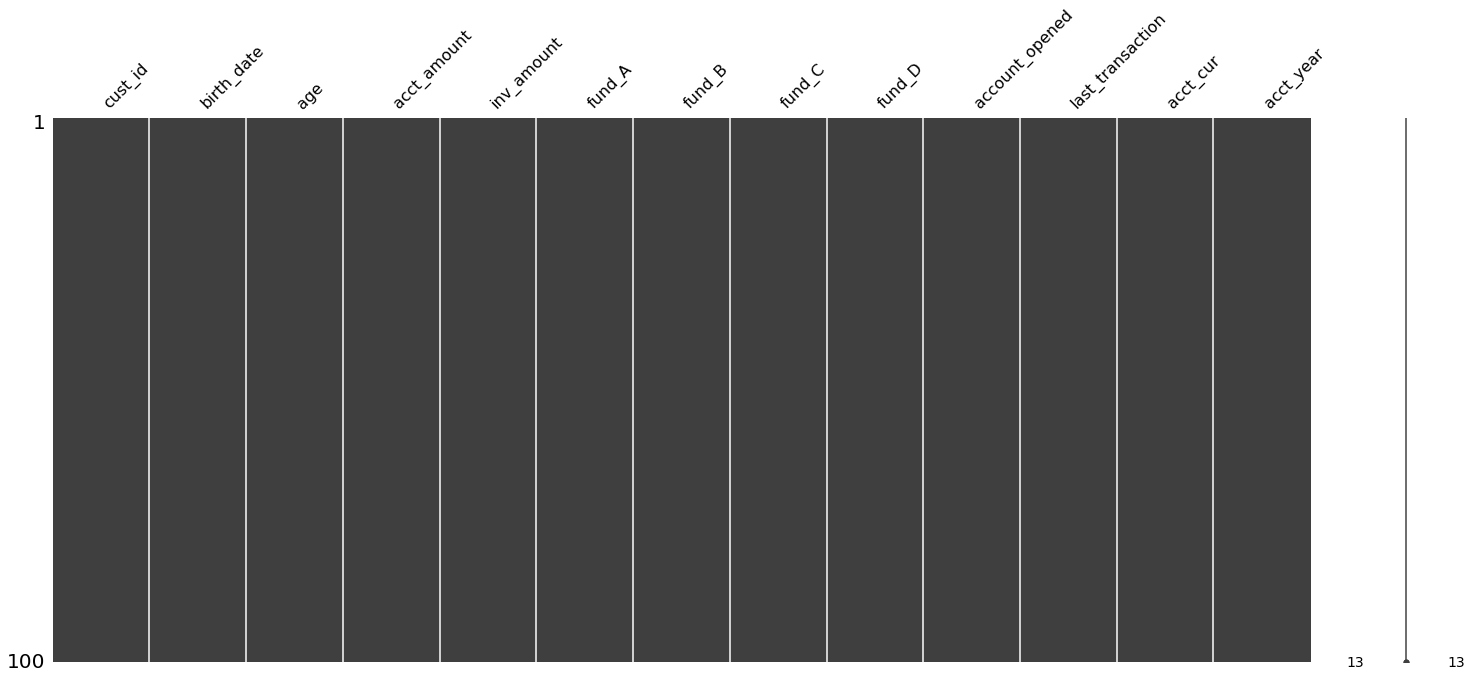

In [21]:
# ! pip install missingno
import missingno as msno
import matplotlib.pyplot as plt

# Print number of missing values in banking
print(banking.isna().sum())

# Visualize missingness matrix
msno.matrix(banking)
plt.show()

# Isolate missing and non missing values of inv_amount
missing_investors = banking[banking['inv_amount'].isna()]
investors = banking[~banking['inv_amount'].isna()]

print(missing_investors.describe())

# Sort banking by age and visualize
banking_sorted = banking.sort_values('age')
msno.matrix(banking_sorted)
plt.show()

# Follow the money

In this exercise, you're working with another version of the banking DataFrame that contains missing values for both the cust_id column and the acct_amount column.

You want to produce analysis on how many unique customers the bank has, the average amount held by customers and more. You know that rows with missing cust_id don't really help you, and that on average acct_amount is usually 5 times the amount of inv_amount.

In this exercise, you will drop rows of banking with missing cust_ids, and impute missing values of acct_amount with some domain knowledge.

In [22]:
# Drop missing values of cust_id
banking_fullid = banking.dropna(subset = ['cust_id'])

# Compute estimated acct_amount
acct_imp = banking_fullid['inv_amount']* 5

# Impute missing acct_amount with corresponding acct_imp
banking_imputed = banking_fullid.fillna({'acct_amount':acct_imp})

# Print number of missing values
print(banking_imputed.isna().sum())

cust_id             0
birth_date          0
age                 0
acct_amount         0
inv_amount          0
fund_A              0
fund_B              0
fund_C              0
fund_D              0
account_opened      0
last_transaction    0
acct_cur            0
acct_year           0
dtype: int64
